Bibliotecas:

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from xgboost import XGBClassifier

Visalizando os dados:

In [4]:
path = r'D:\Python\dataset\heart.csv'
dados = pd.read_csv(path)

dados.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Informações sobre o dataset:

In [5]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Removendo linhas duplicadas:

In [8]:
dp = dados.duplicated().sum()

print(f'número de linhas duplicadas = {dp}')

número de linhas duplicadas = 723


In [10]:
dados.drop_duplicates(inplace=True)

dados.shape

(302, 14)

Cardinalidade:

In [11]:
dados.nunique()

# Dados categóricos estão em um formato numérico e podemos identificalos segundo
# identificalos segundo sua cardinalidade

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [12]:
colunas_cat = [c for c in dados.columns if dados[c].nunique() <=5]
colunas_num = [c for c in dados.columns if dados[c].nunique() > 5]

print(f'Variáveis categóricas: {colunas_cat}')
print()
print(f'Variáveis numéricass: {colunas_num}')

Variáveis categóricas: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

Variáveis numéricass: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


Visualizando as distribuições dos dados:

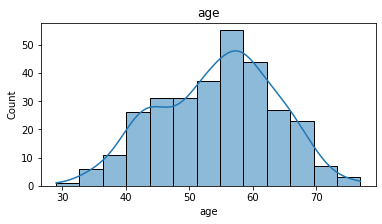

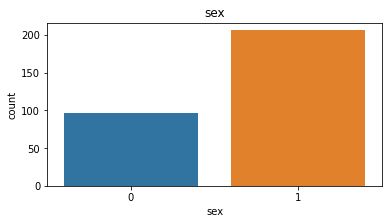

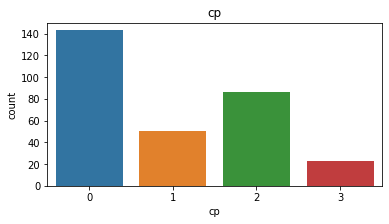

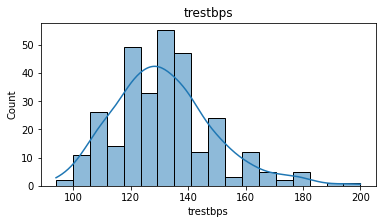

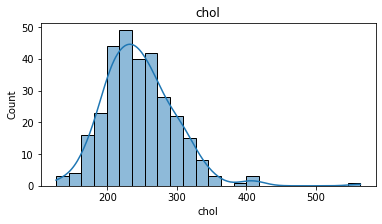

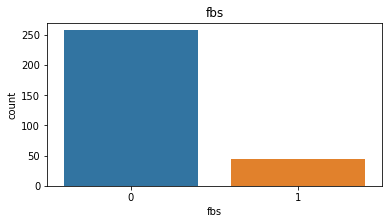

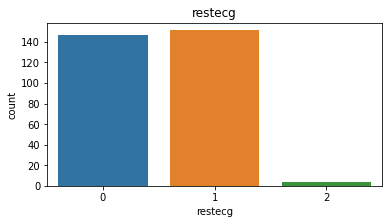

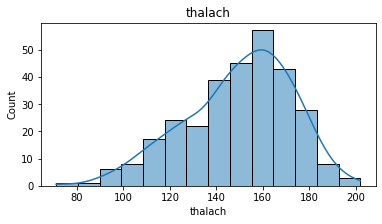

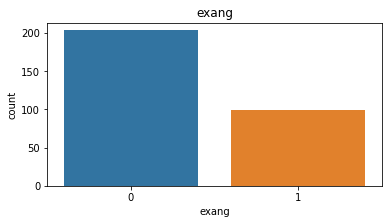

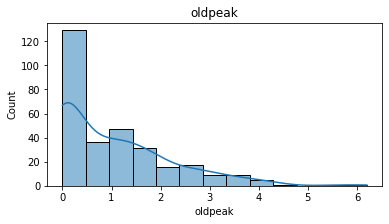

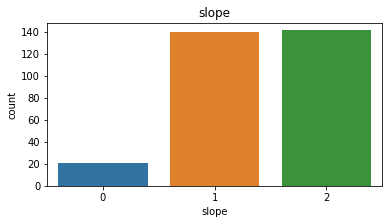

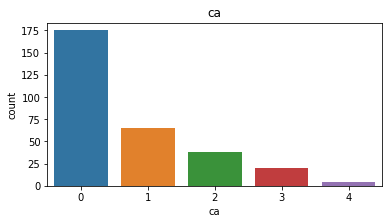

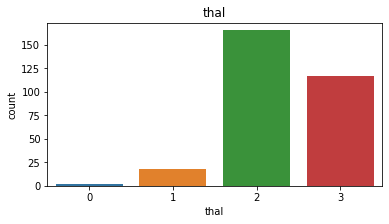

In [13]:
for i in dados.columns.drop('target'):
    plt.figure(figsize = (6,3))
    plt.title(i)
    if i in colunas_cat:
        sns.countplot(x=dados[i])
    else:
        sns.histplot(dados[i], kde=True)

Matriz de correlação:

<AxesSubplot:>

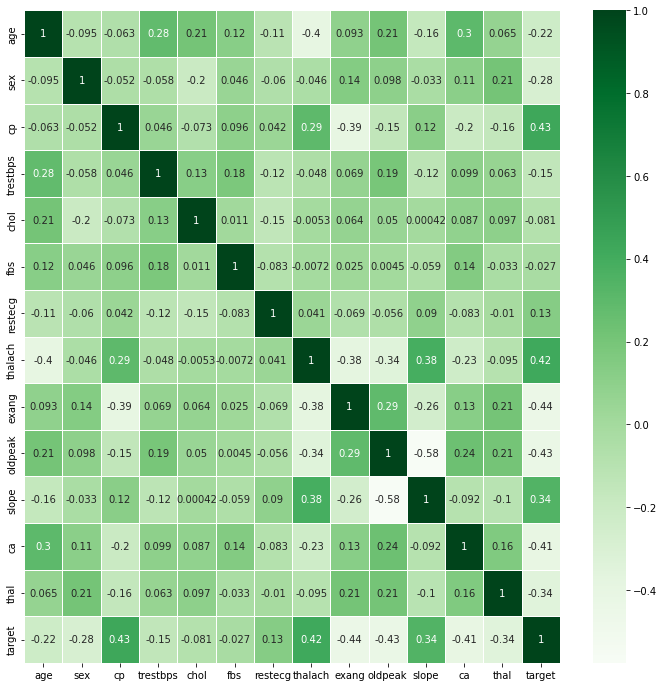

In [14]:
plt.figure(figsize=(12,12))
corr = dados.corr()
sns.heatmap(corr, annot=True, linewidths=.5, cmap='Greens')

Variáveis mais influêntes sobre o alvo:

In [15]:
indx = corr.index[abs(corr['target'])>0.4]

print('Fatores mais influêntes para a classificação de doenças cardíacas:')
for j in indx.drop('target'):
    print(j)

Fatores mais influêntes para a classificação de doenças cardíacas:
cp
thalach
exang
oldpeak
ca


Reagrupando os dados para treinar o modelo:

In [17]:
X = dados.drop('target', axis=1)
y = dados['target']

X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.75)

(302, 13)

Optimizando o modelo:

In [18]:
mae = []
mae_treino = []
lr = np.linspace(0.005, 0.1, 20)

# Optimizando o modelo variando o valor de learning rate:

for k in lr:
    modelo = XGBClassifier(n_estimators=1000, learning_rate=k, n_jobs=4)
    modelo.fit(X_treino, y_treino, 
            early_stopping_rounds=5, 
            eval_set=[(X_valid, y_valid)], 
            verbose=False)
    w = mean_absolute_error(y_valid, modelo.predict(X_valid))
    w_treino = mean_absolute_error(y_treino, modelo.predict(X_treino))
    mae.append(w)
    mae_treino.append(w_treino)


c:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early

In [19]:
print(f'erro médio absoluto (validação): {np.mean(mae)}')
print()
print(f'erro médio absoluto (treino): {np.mean(mae_treino)}')

erro médio absoluto (validação): 0.168942731277533

erro médio absoluto (treino): 0.003333333333333333


Modelo final:

In [20]:

modelo = XGBClassifier(n_estimators=1000, learning_rate=min(mae), n_jobs=4)
modelo.fit(X_treino, y_treino, 
            early_stopping_rounds=5, 
            eval_set=[(X_valid, y_valid)], 
            verbose=False)

c:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.15859030837004406, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, ...)

Previsão e erro médio absoluto:

In [21]:
prev = modelo.predict(X_valid)
ac = mean_absolute_error(y_valid, prev)
print(ac)

0.17180616740088106
